In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np


class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Third column is for an operation indicator
        self.operation_arr = np.asarray(self.data_info.iloc[:, 2])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open(single_image_name)

        # Check if there is an operation
        some_operation = self.operation_arr[index]
        # If there is an operation
        if some_operation:
            # Do some operation on image
            # ...
            # ...
            pass
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len
if __name__ == "__main__":
    # Define transforms
    
    # Define custom dataset
    train_data = CustomDatasetFromImages("Train0.csv")
    validation_data = CustomDatasetFromImages("Val0.csv")
    
    # Define data loader
#     trainset = torch.utils.data.DataLoader(dataset=train_data,
#                                                     batch_size=100,
#                                                     shuffle=True)
    
#     valset = torch.utils.data.DataLoader(dataset=validation_data,
#                                                     batch_size=100,
#                                                     shuffle=False)
    
    #for images, labels in trainset:
        # Feed the data to the model

In [2]:
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [3]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch.optim as optim

preprocessFn = transforms.Compose(
    [transforms.Resize(256),  # 1. Resize smallest side to 256.
     transforms.CenterCrop(224), # 2. Crop the center 224x224 pixels.
     transforms.ToTensor(),
     transforms.Normalize(mean = [0.485, 0.456, 0.406],  # normalize.
                          std = [0.229, 0.224, 0.225])])
print(type(train_data))
# img = []
# labellist = []
imgtensor = torch.zeros(1768,3,224,224)
labeltensor = torch.LongTensor(1768,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(train_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensor[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensor[i,:] = torch.tensor(labels)

imgtensorVal = torch.zeros(328,3,224,224)
labeltensorVal = torch.LongTensor(328,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(validation_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensorVal[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensorVal[i,:] = torch.tensor(labels)
    
print(counter)
# Load the training, and validation datasets.


<class '__main__.CustomDatasetFromImages'>
326


<class 'torch.Tensor'>
torch.Size([3, 224, 224])
Train-epoch 0. Iteration 00010, Avg-Loss: 1.8118, Accuracy: 0.2100
Train-epoch 0. Iteration 00020, Avg-Loss: 1.8168, Accuracy: 0.1900
Train-epoch 0. Iteration 00030, Avg-Loss: 1.8138, Accuracy: 0.1800
Train-epoch 0. Iteration 00040, Avg-Loss: 1.8116, Accuracy: 0.1750
Train-epoch 0. Iteration 00050, Avg-Loss: 1.8008, Accuracy: 0.2040
Train-epoch 0. Iteration 00060, Avg-Loss: 1.7992, Accuracy: 0.2067
Train-epoch 0. Iteration 00070, Avg-Loss: 1.7941, Accuracy: 0.2114
Train-epoch 0. Iteration 00080, Avg-Loss: 1.7854, Accuracy: 0.2275
Train-epoch 0. Iteration 00090, Avg-Loss: 1.7841, Accuracy: 0.2233
Train-epoch 0. Iteration 00100, Avg-Loss: 1.7797, Accuracy: 0.2280
Train-epoch 0. Iteration 00110, Avg-Loss: 1.7759, Accuracy: 0.2318
Train-epoch 0. Iteration 00120, Avg-Loss: 1.7694, Accuracy: 0.2408
Train-epoch 0. Iteration 00130, Avg-Loss: 1.7635, Accuracy: 0.2485
Train-epoch 0. Iteration 00140, Avg-Loss: 1.7617, Accuracy: 0.2500
Train-epoch 0

Train-epoch 6. Iteration 00150, Avg-Loss: 0.7361, Accuracy: 0.8500
Train-epoch 6. Iteration 00160, Avg-Loss: 0.7361, Accuracy: 0.8481
Train-epoch 6. Iteration 00170, Avg-Loss: 0.7281, Accuracy: 0.8512
Validation-epoch 6. Avg-Loss: 0.8530, Accuracy: 0.7195
Train-epoch 7. Iteration 00010, Avg-Loss: 0.6278, Accuracy: 0.8500
Train-epoch 7. Iteration 00020, Avg-Loss: 0.6434, Accuracy: 0.8650
Train-epoch 7. Iteration 00030, Avg-Loss: 0.6420, Accuracy: 0.8700
Train-epoch 7. Iteration 00040, Avg-Loss: 0.6175, Accuracy: 0.8800
Train-epoch 7. Iteration 00050, Avg-Loss: 0.6075, Accuracy: 0.8800
Train-epoch 7. Iteration 00060, Avg-Loss: 0.6092, Accuracy: 0.8850
Train-epoch 7. Iteration 00070, Avg-Loss: 0.6177, Accuracy: 0.8814
Train-epoch 7. Iteration 00080, Avg-Loss: 0.6171, Accuracy: 0.8825
Train-epoch 7. Iteration 00090, Avg-Loss: 0.6105, Accuracy: 0.8867
Train-epoch 7. Iteration 00100, Avg-Loss: 0.6013, Accuracy: 0.8900
Train-epoch 7. Iteration 00110, Avg-Loss: 0.6057, Accuracy: 0.8855
Train-e

Train-epoch 13. Iteration 00110, Avg-Loss: 0.2266, Accuracy: 0.9827
Train-epoch 13. Iteration 00120, Avg-Loss: 0.2269, Accuracy: 0.9833
Train-epoch 13. Iteration 00130, Avg-Loss: 0.2253, Accuracy: 0.9823
Train-epoch 13. Iteration 00140, Avg-Loss: 0.2250, Accuracy: 0.9829
Train-epoch 13. Iteration 00150, Avg-Loss: 0.2237, Accuracy: 0.9833
Train-epoch 13. Iteration 00160, Avg-Loss: 0.2244, Accuracy: 0.9825
Train-epoch 13. Iteration 00170, Avg-Loss: 0.2265, Accuracy: 0.9818
Validation-epoch 13. Avg-Loss: 0.5347, Accuracy: 0.8232
Train-epoch 14. Iteration 00010, Avg-Loss: 0.2067, Accuracy: 0.9900
Train-epoch 14. Iteration 00020, Avg-Loss: 0.2125, Accuracy: 0.9750
Train-epoch 14. Iteration 00030, Avg-Loss: 0.1917, Accuracy: 0.9833
Train-epoch 14. Iteration 00040, Avg-Loss: 0.1950, Accuracy: 0.9875
Train-epoch 14. Iteration 00050, Avg-Loss: 0.2001, Accuracy: 0.9840
Train-epoch 14. Iteration 00060, Avg-Loss: 0.2009, Accuracy: 0.9850
Train-epoch 14. Iteration 00070, Avg-Loss: 0.1997, Accuracy:

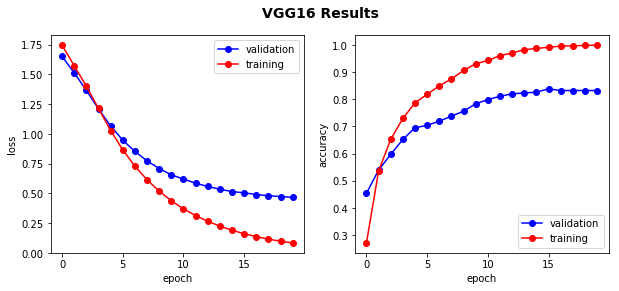

In [4]:
from random import shuffle
# randomizer = [i for i in range(2390)]
# shuffle(randomizer)
# print(randomizer)

train_accuracies = []; val_accuracies = []
train_losses = []; val_losses = []

trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)

print(type(imgtensor))
print(imgtensor[0].shape)

def train_model(model, loss_fn, batchSize, trainset, valset, optimizer):
  
  # Shuffling is needed in case dataset is not shuffled by default.
  train_loader = torch.utils.data.DataLoader(dataset = trainset,
                                              batch_size = batchSize,
                                              shuffle = True)
#   # We don't need to bach the validation set but let's do it anyway.
  val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
  
  # Define number of epochs.
  N = 20

  # log accuracies and losses.
  train_accuracies = []; val_accuracies = []
  train_losses = []; val_losses = []

  # GPU enabling.
  model = model.cuda()
  loss_fn = loss_fn.cuda()


  # Training loop. Please make sure you understand every single line of code below.
  # Go back to some of the previous steps in this lab if necessary.
  for epoch in range(0, N):
      correct = 0.0
      cum_loss = 0.0

      # Make a pass over the training data.
      #model.train()
      for (i, (inputs, labels)) in enumerate(train_loader):
          #print(type(inputs))
          inputs = inputs.cuda()
          labels = labels.cuda()
          #print(inputs.shape)
          #trans = transforms.ToPILImage()
          #img = transforms.ToPILImage()(inputs)
          #pil_img = trans(inputs)
          #input_img =  preprocessFn(pil_img).unsqueeze(0)
          # Forward pass. (Prediction stage)
          scores = model(inputs)
#           print(labels)
          loss = loss_fn(scores, labels.view(-1))
#           print(labels.view(-1))
#           print(scores.shape)
          # Count how many correct in this batch.
          max_scores, max_labels = scores.max(1)
#           print(max_labels)
#           print(labels.view(-1))
          correct += (max_labels == labels.view(-1)).sum().item()
          cum_loss += loss.item()

          # Zero the gradients in the network.
          optimizer.zero_grad()

          #Backward pass. (Gradient computation stage)
          loss.backward()

          # Parameter updates (SGD step) -- if done with torch.optim!
          optimizer.step()
          # Parameter updates (SGD step) -- if done manually!
          # for param in model.parameters():
          #   param.data.add_(-learningRate, param.grad)

          # Logging the current results on training.
          if (i + 1) % 10 == 0:
              print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batchSize)))


      train_accuracies.append(correct / len(trainset))
      train_losses.append(cum_loss / (i + 1))   

      # Make a pass over the validation data.
      correct = 0.0
      cum_loss = 0.0
      model.eval()
      for (i, (inputs, labels)) in enumerate(val_loader):
           inputs = inputs.cuda()
           labels = labels.cuda()


#           # Forward pass. (Prediction stage)
           scores = model(inputs)
           cum_loss += loss_fn(scores, labels.view(-1)).item()

#            # Count how many correct in this batch.
           max_scores, max_labels = scores.max(1)
           correct += (max_labels == labels.view(-1)).sum().item()

      val_accuracies.append(correct / len(valset))
      val_losses.append(cum_loss / (i + 1))
      
      # Logging the current results on validation.
      print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(valset)))
    
  fig = plt.figure(figsize = (10, 4))
  fig.suptitle('VGG16 Results', fontsize=14, fontweight='bold')
  plt.subplot(1, 2, 1)
  plt.plot(val_losses, 'bo-', label = 'val-loss')
  plt.plot(train_losses, 'ro-', label = 'train-loss') 
  plt.ylabel('loss')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(val_accuracies, 'bo-', label = 'val-acc')
  plt.plot(train_accuracies, 'ro-', label = 'train-acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='lower right')
  plt.show()      



for param in vgg16.parameters():
    param.requires_grad = False
vgg16.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 6),
        )
# vgg16.classifier[-1].requires_grad = True


model = vgg16

loss_fn = nn.CrossEntropyLoss()
    
# Create the model.
# Optimizer.
learningRate = 1e-6
optimizer = optim.Adam(model.parameters(), lr = learningRate)
batchSize = 10

train_model(model, loss_fn, batchSize, trainset, valset, optimizer)

66
5
66
5
1000
328
328


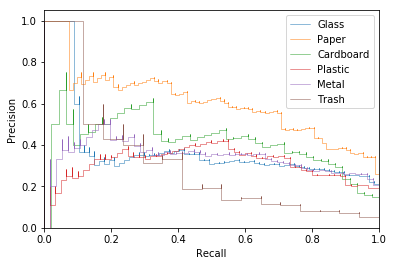

In [5]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]

score_list = []
label_list = []
ypred_list = []
y_pred = []
ytrue_list = []

def precisionrecall():
    batchSize = 5
    
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
    model_load = model
    model_load.eval()



    
    
    for (i, (inputs, labels)) in enumerate(val_loader):
        
        inputs = inputs.cuda()
        labels = labels.cuda()

        #           # Forward pass. (Prediction stage)
        scores = model_load(inputs)
        
        #            # Count how many correct in this batch.
        max_scores, max_labels = scores.max(1)
        y_pred.append(max_labels.cpu().tolist())

#         stores the scores and labels for computation of the precision recall curve
        score_list.append(scores.cpu().tolist())
        label_list.append(labels.view(-1).cpu().tolist())
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break
                    
    for i in y_pred:
        for counter in  i:
            ypred_list.append(counter)
               


    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)

    print(len(label_list))
    print(len(label_list[0]))
    
    print(len(score_list))
    print(len(score_list[0]))
    print(len(score_list[0][0]))
    
    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    print(len(scoreholder[0]))
    print(len(x))
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-vgg16.png', dpi = 720)

    


                          
precisionrecall()

[2 3 0 0 0 2 4 5 0 1 2 4 1 0 0 0 1 5 3 2 3 1 0 3 0 3 3 4 1 1 0 1 2 1 0 3 3
 4 4 4 3 1 2 0 4 4 2 0 5 1 1 1 2 2 3 0 3 2 4 4 0 4 0 5 0 2 0 2 1 3 2 5 4 1
 1 1 1 0 1 4 0 2 3 4 2 0 3 1 0 1 0 1 3 2 4 1 0 3 1 1 2 0 2 3 3 0 4 3 2 3 1
 0 3 2 3 3 2 2 4 4 0 2 2 2 1 4 0 1 3 0 4 3 0 1 1 3 5 3 3 1 0 3 1 3 3 0 4 0
 1 0 0 1 4 3 4 3 0 1 0 0 3 2 0 3 3 4 2 3 5 0 1 0 3 0 1 3 3 1 0 5 2 1 1 2 0
 1 5 1 4 2 1 1 2 4 1 4 3 1 4 1 3 1 4 2 1 0 1 4 1 4 2 2 1 2 3 4 5 1 1 3 2 0
 5 0 1 1 2 1 1 1 3 0 3 0 5 1 1 3 2 0 0 0 1 0 0 0 2 1 4 4 1 0 0 5 1 5 1 1 5
 4 2 1 1 4 1 2 3 0 4 1 4 3 3 4 5 2 4 3 5 1 1 1 4 3 4 4 1 2 4 2 0 3 3 4 3 1
 4 1 1 4 4 0 4 3 4 3 4 4 4 4 1 1 3 1 0 1 3 0 4 2 0 4 2 3 0 1 0 0]
[[29  9  4 13  9  3]
 [ 9 52  1 11  9  0]
 [ 0  7 28  4  6  1]
 [ 7  8  3 35  6  1]
 [13  9  2  3 27  2]
 [ 5  2  0  3  2  5]]
[[0.43283582 0.13432836 0.05970149 0.19402985 0.13432836 0.04477612]
 [0.1097561  0.63414634 0.01219512 0.13414634 0.1097561  0.        ]
 [0.         0.15217391 0.60869565 0.08695652 0.13043478 0.02173913]


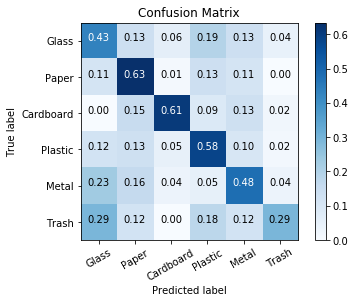

In [6]:
#Confusion Matrix Part
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


normalize = True
tensorino = torch.tensor([1])
ytrue_list = []

for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    
# print(tensorino)

print(np.asarray(ytrue_list))
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]
print(confusion_matrix(ytrue_list, ypred_list))

# plot_confusion_matrix(np.asarray(ytrue_list[-1].tolist()), np.asarray(ypred_list[-1].tolist()), classes=class_names,
#                       normalize=False)
cm = confusion_matrix(ytrue_list,ypred_list)
piun = [0]*6
for i in range(0, cm.shape[1]):
    piun[i] =  np.ndarray.tolist(np.divide(cm[i],np.sum(cm[i])))

cm = np.asarray(piun)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        xticklabels=class_names, yticklabels=class_names,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.xticks( rotation=30)
print(cm)
plt.imshow(cm, cmap = plt.cm.Blues)
